# <h1><center>PIMA Diabetes - KNN Algorithm</center></h1>

<center><img src="diabetes.jpg" width="500" height="500"></center>

## <center>By : Nitika</center>

# Import Library

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

# Load file

In [43]:
## on my system there is an issue so give the whole path for the file
# in order to run on your local either use the second option else give the absolute path
#diabetes_data="~/Documents/workspace/DataScience/IntoToDS/presentation/diabetes.csv"
diabetes_data="diabetes.csv"

#load data using panda's read_csv function
diabetes_df = pd.read_csv(diabetes_data)


#list the dataset
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# EDA and Statistical Analysis

In [5]:
## gives information about the data types,columns, null value counts, memory usage etc
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


  ### We can observe that the data set contain 768 rows and 9 columns. ‘Outcome’ is the column which we are going to predict, which says if the patient is diabetic or not. 1 means the person is diabetic and 0 means a person is not

In [6]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


    describe() : generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

    the describe() method deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display summary for the other columns

In [7]:
diabetes_df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

### We can identify that out of the 768 persons, 500 are labeled as 0 (non-diabetic) and 268 as 1 (diabetic)

0    500
1    268
Name: Outcome, dtype: int64


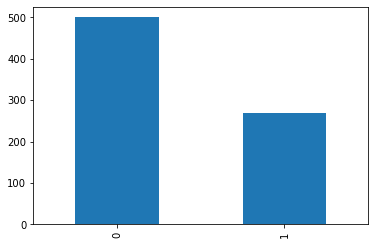

In [19]:
## checking the balance of the data by plotting the count of outcomes by their value
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = diabetes_df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_df.Outcome.value_counts())
p=diabetes_df.Outcome.value_counts().plot(kind="bar")

    The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients

## Correlation Matrix : Heatmap

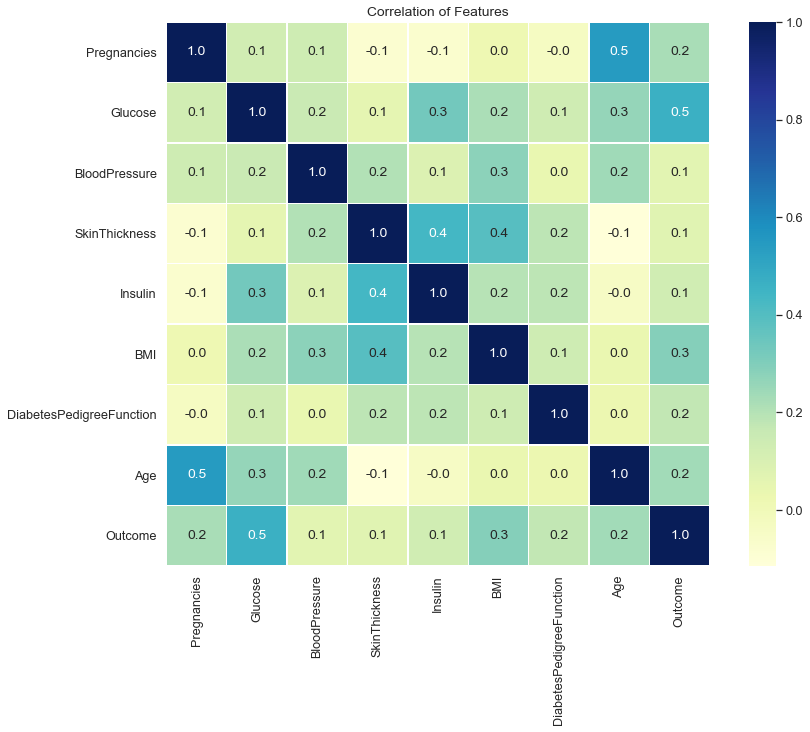

In [20]:
sns.set(font_scale = 1.15)
plt.figure(figsize = (14, 10))

sns.heatmap(diabetes_df.corr(), vmax = 1, linewidths = 0.5, fmt= '.1f',
            square = True, annot = True, cmap = 'YlGnBu', linecolor = "white")
plt.title('Correlation of Features');

### We observe that:
    * Glucose, Age and BMI are the most Correlated features with the 'Outcome'
    * Bloodpressure, SkinThikness have tiny Correlation with the outcome !
    * check how the SkinThikness and BMI Correlated, since most of the fat people tends to have thick skin
    * Age with Pregnancies are the most Correlated features
    * Insulin with Glucuse
    * finally SkinThikness with Insulin !

# Data Cleaning

In [8]:
diabetes_df.isnull().sum()
diabetes_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

    We can observe that there are no data points missing in the data set. If there were any, we should deal with them accordingly.
    
    But in describe() we notice that Glucose, BloodPressure, skinThickness, Insulin and BMI have minimum value as 0(zero) which doesn't make any sense,
    So its better to replaves zero with NaN and after that countinf them would be eaiser and zero need to be replacced with suitable values

In [11]:
diabetes_df_copy = diabetes_df.copy(deep = True)
diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


    In order to fill these Nan values the data distribution needs to be understood

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1266e0df0>,
      dtype=object)

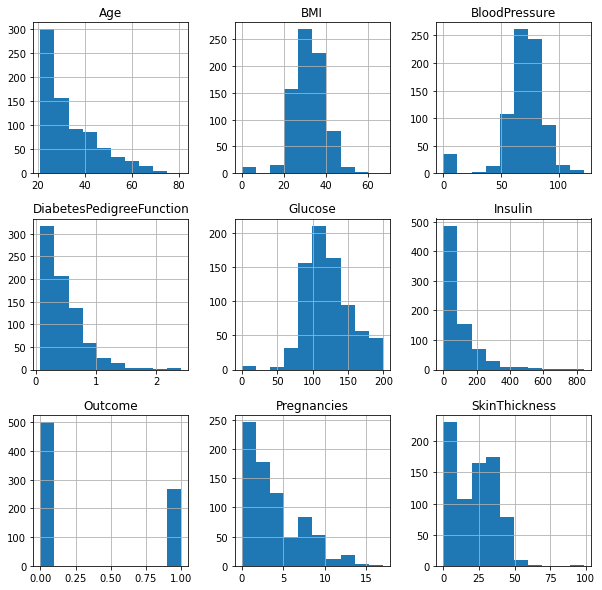

In [13]:
diabetes_df.hist(figsize = (10,10))

    When analyzing the histogram we can identify that there are some outliers in some columns. We will further analyze those outliers and determine what we can do about them.

 ### From above histogram we observe the follwoing:
     * Blood pressure: By observing the data we can see that there are 0 values for blood pressure. And it is evident that the readings of the data set seem wrong because a living person cannot have a diastolic blood pressure of zero. By observing the data we can see 35 counts where the value is 0.
     * Plasma glucose levels :Even after fasting glucose levels would not be as low as zero. Therefore zero is an invalid reading. By observing the data we can see 5 counts where the value is 0.
     * Skin Fold Thickness:  For normal people, skin fold thickness can’t be less than 10 mm better yet zero. Total count where value is 0: 227.
     * BMI: Should not be 0 or close to zero unless the person is really underweight which could be life-threatening.
     * Insulin: In a rare situation a person can have zero insulin but by observing the data, we can find that there is a total of 374 counts.

  ### So we impute nan values for the columns in accordance with their distribution

In [18]:
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)

In [17]:
print(diabetes_df_copy.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# Machine Learing Model : KNN


     In the data set, we have the following features.
    ‘Pregnancies’, ‘Glucose’, ‘Blood Pressure’, ‘Skin Thickness’, ‘Insulin’, ‘BMI’, ‘Diabetes Pedigree Function’, ‘Age’

    By a crude observation, we can say that the ‘Skin Thickness’ is not an indicator of diabetes. But we can’t deny the fact that it is unusable at this point.

    Therefore we will use all the features available. We separate the data set into features and the response that we are going to predict. We will assign the features to the X variable and the response to the y variable.

    So our The objective is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset

In [21]:
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes_df_copy[feature_names]
y = diabetes_df_copy.Outcome

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = diabetes_df_copy.Outcome, random_state=0)

In [24]:
knn_model= KNeighborsClassifier()

In [25]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [29]:
y_pred = knn_model.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)

In [30]:
print("accuracy Score of the model: \t", acc_score)

accuracy Score of the model: 	 0.7135416666666666


    We get accuracy score of approx 71 % , usiing the KNN model.

In [38]:
#Great! now, let's run the kNN classifier with 3 neighbors and see how it does. 
diab_knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train) 
y_pred = diab_knn.predict(X_test) 
y_train_pred = diab_knn.predict(X_train) 


In [39]:
#Let's get the score summary print "Results with 3 Neighbors" 
print(metrics.classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']) )
print(metrics.classification_report(y_train, y_train_pred, target_names=['No Diabetes', 'Diabetes']) )


              precision    recall  f1-score   support

 No Diabetes       0.78      0.80      0.79       125
    Diabetes       0.60      0.57      0.58        67

    accuracy                           0.72       192
   macro avg       0.69      0.68      0.69       192
weighted avg       0.72      0.72      0.72       192

              precision    recall  f1-score   support

 No Diabetes       0.87      0.90      0.88       375
    Diabetes       0.80      0.75      0.77       201

    accuracy                           0.85       576
   macro avg       0.84      0.82      0.83       576
weighted avg       0.85      0.85      0.85       576



    So we had a training accuracy of 84% but only a test accuracy of 72% #The precision/recall metrics tell us out of each category (No Diabetes or Diabetes) how many we predicted right. 


In [42]:
#OK, not so great so far. Let's see if we can improve the score by increasing neighbors. 
diab_knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train) 
y_pred = diab_knn.predict(X_test) 
y_train_pred = diab_knn.predict(X_train) 

#Let's get the score summary print "Results with 5 Neighbors" 
print(metrics.classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']) )
print(metrics.classification_report(y_train, y_train_pred, target_names=['No Diabetes', 'Diabetes']) )


              precision    recall  f1-score   support

 No Diabetes       0.77      0.81      0.79       125
    Diabetes       0.60      0.54      0.57        67

    accuracy                           0.71       192
   macro avg       0.68      0.67      0.68       192
weighted avg       0.71      0.71      0.71       192

              precision    recall  f1-score   support

 No Diabetes       0.84      0.86      0.85       375
    Diabetes       0.73      0.70      0.71       201

    accuracy                           0.80       576
   macro avg       0.78      0.78      0.78       576
weighted avg       0.80      0.80      0.80       576



    OK we did ever so slightly better on the test set but did much poorly on the Training set. 
    
    If we continue to tune in this fashion, we will end up biasing our model based on the Test set. 
    
    Trying out even more number of neighbors, turns out our first choice of neighbors=3 is actually the best.


## Conclusion

    So ,we finally achieve our  objective  to  predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the datase.

    For further enhancement we can look deep into how all other feature contribute to be a diabtetic or not.

 # Thank You !